<a href="https://colab.research.google.com/github/krakowiakpawel9/ml_course/blob/master/sl/12_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję `0.22.1`


### Spis treści:
1. [Import bibliotek](#a1)
2. [Regresja Logistyczna (Logistic Regression) - wprowadzenie](#a2)
3. [Załadowanie danych](#a3)
4. [Podział danych na zbiór treningowy i testowy](#a4)
5. [Przygotowanie danych do modelu](#a44)
6. [Dopasowanie modelu](#a5)
7. [Predykcja na podstawie modelu](#a6)
8. [Ocena modelu](#a7)

### <a name='a1'></a> Import bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
import sklearn

sns.set(font_scale=1.3)
np.set_printoptions(precision=6, suppress=True, edgeitems=10, linewidth=100000, formatter=dict(float=lambda x: f'{x:.2f}'))
sklearn.__version__

'0.22.1'

###  <a name='a2'></a>  Regresja Logistyczna (Logistic Regression) - wprowadzenie

Pomimo nazwy jest to liniowy model do zadań klasyfikacyjnych. Inna nazwa Logit Regression. 

#### Przykłady zastosowań:
- przewidywanie czy mail jest spamem, czy też nie
- przewidywanie czy użytkownik kliknie w reklamę
- przewidywanie czy nowotwór jest złośliwy czy też nie
- przewidywanie czy dłużnik spłaci wierzycielowi dług, czy też zajdzie zdarzenie default
- przewidywanie czy transakcja jest próbą oszustwa

Przy budowie modelu regresji logistycznej wykorzystamy funkcję sigmoid. Definiuje się ją wzorem:
$$sigmoid(x) = \frac{1}{1+e^{-x}}$$

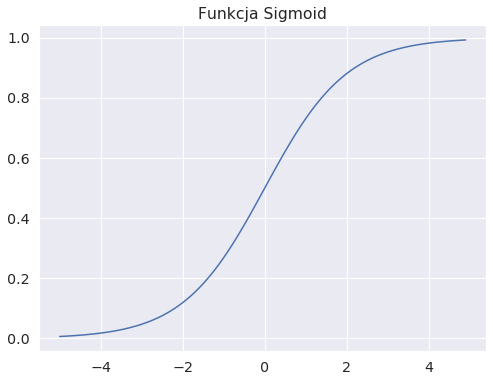

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X = np.arange(-5, 5, 0.1)
y = sigmoid(X)

plt.figure(figsize=(8, 6))
plt.plot(X, y)
plt.title('Funkcja Sigmoid')
plt.show()

Następnie rozważmy funkcję liniową $y = w_0 + w_1x$. Podstawiając to do funkcji sigmoid otrzymujemy:
$$p(x) = \frac{1}{1 + e^{-(w_0 + w_1x)}}$$
Dzięki temu przekształceniu regresja logistyczna zwraca nam wartości z przedziału $(0, 1)$ co możemy interpretować jako prawdopodobieństwo i na podstawie tych prawdopodobieństw przewidywać poszczególne klasy.

###  <a name='a3'></a> Załadowanie danych

In [3]:
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
raw_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(raw_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [5]:
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']

print(f'rozmiar data: {data.shape}')
print(f'rozmiar target: {target.shape}')

rozmiar data: (569, 30)
rozmiar target: (569,)


###  <a name='a4'></a> Podział danych na zbiór treningowy i testowy

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (426, 30)
y_train shape: (426,)
X_test shape: (143, 30)
y_test shape: (143,)


###  <a name='a44'></a> Przygotowanie danych do modelu

In [7]:
X_train

array([[16.78, 18.80, 109.30, 886.30, 0.09, 0.09, 0.08, 0.07, 0.19, 0.06, ..., 20.05, 26.30, 130.70, 1260.00, 0.12, 0.21, 0.23, 0.15, 0.28, 0.07],
       [11.32, 27.08, 71.76, 395.70, 0.07, 0.04, 0.02, 0.00, 0.19, 0.06, ..., 12.08, 33.75, 79.82, 452.30, 0.09, 0.14, 0.11, 0.02, 0.28, 0.07],
       [10.49, 19.29, 67.41, 336.10, 0.10, 0.09, 0.03, 0.01, 0.22, 0.06, ..., 11.54, 23.31, 74.22, 402.80, 0.12, 0.15, 0.08, 0.03, 0.28, 0.08],
       [9.74, 15.67, 61.50, 289.90, 0.09, 0.05, 0.01, 0.01, 0.21, 0.06, ..., 10.75, 20.88, 68.09, 355.20, 0.15, 0.09, 0.04, 0.05, 0.28, 0.08],
       [9.79, 19.94, 62.11, 294.50, 0.10, 0.05, 0.01, 0.01, 0.14, 0.07, ..., 10.92, 26.29, 68.81, 366.10, 0.13, 0.09, 0.02, 0.02, 0.19, 0.09],
       [14.04, 15.98, 89.78, 611.20, 0.08, 0.06, 0.04, 0.03, 0.17, 0.06, ..., 15.66, 21.58, 101.20, 750.00, 0.12, 0.13, 0.11, 0.07, 0.27, 0.07],
       [19.44, 18.82, 128.10, 1167.00, 0.11, 0.14, 0.23, 0.12, 0.18, 0.06, ..., 23.96, 30.39, 153.90, 1740.00, 0.15, 0.37, 0.59, 0.21,

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[0.80, -0.11, 0.77, 0.71, -0.55, -0.23, -0.04, 0.48, 0.31, -1.06, ..., 0.84, 0.09, 0.76, 0.73, -0.72, -0.28, -0.20, 0.52, -0.15, -0.66],
       [-0.80, 1.78, -0.84, -0.74, -1.94, -1.30, -0.94, -1.23, 0.22, -0.92, ..., -0.89, 1.28, -0.84, -0.76, -1.83, -0.73, -0.80, -1.48, -0.09, -0.73],
       [-1.05, 0.00, -1.03, -0.92, 0.24, -0.35, -0.76, -0.99, 1.53, 0.29, ..., -1.00, -0.39, -1.01, -0.85, -0.49, -0.69, -0.95, -1.30, -0.13, -0.48],
       [-1.27, -0.82, -1.28, -1.05, -0.43, -1.12, -1.01, -0.93, 1.02, 0.05, ..., -1.17, -0.78, -1.21, -0.94, 0.62, -1.05, -1.14, -0.99, -0.10, -0.14],
       [-1.25, 0.15, -1.26, -1.04, 0.42, -1.00, -1.06, -1.10, -1.73, 0.87, ..., -1.14, 0.09, -1.18, -0.92, -0.06, -1.04, -1.24, -1.43, -1.60, 0.31],
       [-0.00, -0.75, -0.07, -0.10, -0.84, -0.88, -0.69, -0.51, -0.36, -0.54, ..., -0.11, -0.67, -0.17, -0.21, -0.60, -0.84, -0.79, -0.63, -0.29, -0.65],
       [1.58, -0.11, 1.57, 1.54, 0.88, 0.82, 1.82, 1.94, 0.05, -0.23, ..., 1.69, 0.74, 1.48, 1.61, 0.

In [9]:
scaler.mean_

array([14.05, 19.28, 91.42, 646.08, 0.10, 0.10, 0.09, 0.05, 0.18, 0.06, 0.40, 1.22, 2.82, 39.54, 0.01, 0.03, 0.03, 0.01, 0.02, 0.00, 16.17, 25.75, 106.56, 865.65, 0.13, 0.25, 0.27, 0.11, 0.29, 0.08])

In [10]:
scaler.scale_

array([3.40, 4.39, 23.34, 338.42, 0.01, 0.05, 0.08, 0.04, 0.03, 0.01, 0.28, 0.56, 2.02, 47.07, 0.00, 0.02, 0.03, 0.01, 0.01, 0.00, 4.62, 6.27, 31.91, 542.67, 0.02, 0.15, 0.20, 0.06, 0.06, 0.02])

###<a name='a5'></a>  Dopasowanie modelu

In [11]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

###<a name='a6'></a>  Predykcja na podstawie modelu

In [12]:
y_pred = log_reg.predict(X_test)
y_pred[:30]

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1])

###<a name='a7'></a>  Ocena modelu

Accuracy: 0.9790209790209791


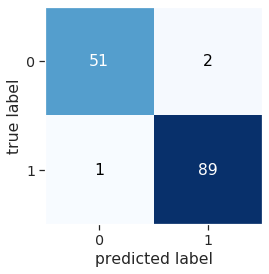

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

In [14]:
def plot_confusion_matrix(cm):
    # klasyfikacja binarna
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_1', 'true_0'])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=500, height=500, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.98      0.99      0.98        90

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

